# <p align="left">
  <img src="./logo_UTN.svg" />
</p>


# **Teoría de Circuitos II - R4001 - 2023**
## Trabajo Semanal 7
### Autor: Bruno Glecer



# Consigna

Realizar los ejercicios 2 y 3 del TP5 de Filtros digitales:

<p align="left">
  <img src="./consigna_1.png" width=600>
</p>

<p align="left">
  <img src="./consigna_1bis.png" width=600>
</p>

<p align="left">
  <img src="./consigna_1bisbis.png" width=600>
</p>

<p align="left">
  <img src="./consigna_2.png" width=900>
</p>



# Ejercicio Guia #2

## A) Pasa bajos Butterworth orden 2 $f_c = 1$kHz con $f_s = 100$kHz

A continuacion realizo la sintesis del filtro digital utilizando la libreria scipy

Coeficientes numerador: [0.00094408 0.00188817 0.00094408]
Coeficientes denominador: [ 1.         -1.91122623  0.91500257]
Ganancia en frecuencia de corte: -3.013159098568725
Diferencia con -3.01dB: -0.0028591419289130116


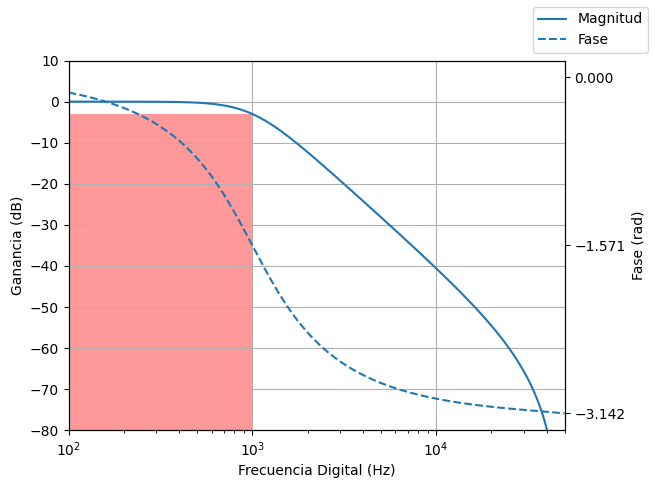

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import signal
from pytc2.sistemas_lineales import bodePlot
import numpy as np
import sympy
from IPython.display import display, Math
sympy.init_printing() 

fs = 100e3

fc = 1e3

gain_3db = 10*np.log10(0.5)


analog_b, analog_a = signal.butter(2, 2*np.pi*fc, analog=True, output='ba')


digital_b, digital_a = signal.bilinear(analog_b, analog_a, fs=fs)
digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

print(f"Coeficientes numerador: {digital_b}")
print(f"Coeficientes denominador: {digital_a}")

ax1.plot(digital_W, 20*np.log10(np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.set_xlim(1e2, fs/2)
ax1.set_ylim(-80, 10)
ax1.grid()
ax1.add_patch(patches.Rectangle((0, -3), fc, -1e9, linewidth=1, facecolor=(1,0,0,0.4)))

gain_at_fc = 20*np.log10(abs(digital_H[(np.abs(digital_W - fc)).argmin()]))

fig.legend()

print(f"Ganancia en frecuencia de corte: {gain_at_fc}")
print(f"Diferencia con -3.01dB: {gain_at_fc - gain_3db}")

plt.show()

A simple vista parece estar bien diseñado, el modulo muestra una atenuacion de aproximadamente -3dB en la frecuencia de corte como se esperaba. Sin embargo, esto solamente funciona porque la frecuencia de corte es muy baja (50 veces mas baja) comparada con la frecuencia de Nyquist.

Mas en el extremo derecho del grafico se puede observar los effectos del frequency warping causados por la transformacion bilineal.

## B) Pasa bajos Butterworth orden 2 $f_c = 1$kHz con $f_s = 10$kHz

Coeficientes numerador: [0.06396438 0.12792877 0.06396438]
Coeficientes denominador: [ 1.         -1.16826067  0.42411821]
Ganancia en frecuencia de corte: -3.3126674311751003
Diferencia con -3.01dB: -0.3023674745352882


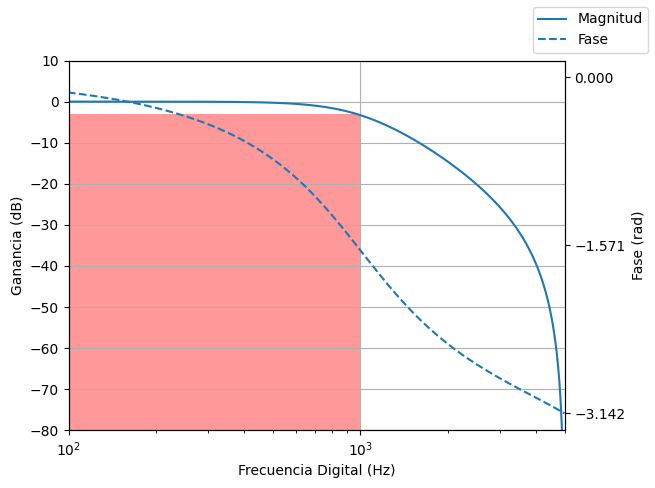

In [33]:

fs = 10e3

digital_b, digital_a = signal.bilinear(analog_b, analog_a, fs=fs)

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W, 20*np.log10(np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')

print(f"Coeficientes numerador: {digital_b}")
print(f"Coeficientes denominador: {digital_a}")

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.set_xlim(1e2, fs/2)
ax1.set_ylim(-80, 10)
ax1.grid()
ax1.add_patch(patches.Rectangle((0, -3), fc, -1e9, linewidth=1, facecolor=(1,0,0,0.4)))

gain_at_fc = 20*np.log10(abs(digital_H[(np.abs(digital_W - fc)).argmin()]))

fig.legend()

print(f"Ganancia en frecuencia de corte: {gain_at_fc}")
print(f"Diferencia con -3.01dB: {gain_at_fc - gain_3db}")

plt.show()

En este punto la frecuencia de corte sigue siendo relativamente baja comparado con la frecuencia de Nyquist (5 veces), pero ya se puede notar una discrepancia de la ganancia en la frecuencia de corte, en este caso resultó ser de -3.313dB, cercano a lo deseado pero no exacto.

## C.A) Pasa altos Butterworth orden 2 $f_c = 6$kHz con $f_s = 100$kHz

Coeficientes numerador: [ 0.76798807 -1.53597615  0.76798807]
Coeficientes denominador: [ 1.         -1.48140203  0.59055027]
Ganancia en frecuencia de corte: -2.907805670467658
Diferencia con -3.01dB: 0.10249428617215406


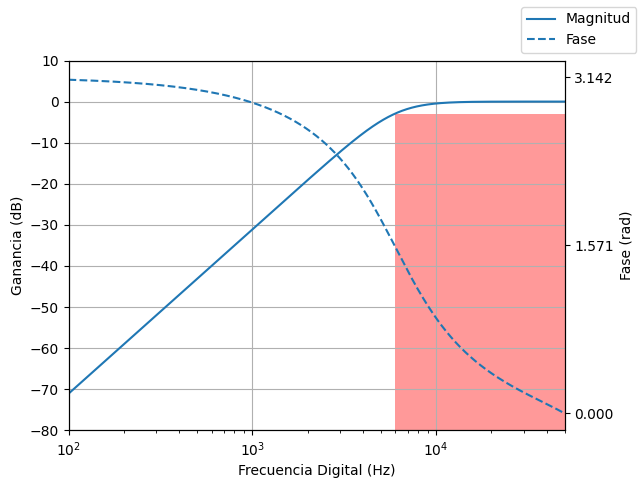

In [34]:

fc = 6e3
fs = 100e3

analog_b, analog_a = signal.butter(2, 2*np.pi*fc, analog=True, output='ba', btype='highpass')

digital_b, digital_a = signal.bilinear(analog_b, analog_a, fs=fs)

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W[digital_H != 0], 20*np.log10(np.abs(digital_H)[digital_H != 0]), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')

print(f"Coeficientes numerador: {digital_b}")
print(f"Coeficientes denominador: {digital_a}")

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, np.pi/2, np.pi])

ax1.set_xlim(1e2, fs/2)
ax1.set_ylim(-80, 10)
ax1.grid()
ax1.add_patch(patches.Rectangle((fc, -3), 1e9, -1e9, linewidth=1, facecolor=(1,0,0,0.4)))

gain_at_fc = 20*np.log10(abs(digital_H[(np.abs(digital_W - fc)).argmin()]))

fig.legend()

print(f"Ganancia en frecuencia de corte: {gain_at_fc}")
print(f"Diferencia con -3.01dB: {gain_at_fc - gain_3db}")

plt.show()

En este caso el filtro parece comportarse bien, pero tambien se nota una discrepancia entre la ganancia en la frecuencia de corte y la deseada.

## C.B) Pasa altos Butterworth orden 2 $f_c=6$kHz con $f_s=10$kHz

Este filtro es imposible de realizar debidoa a que la frecuencia de corte se encuentra por arriba de la frecuencia de Nyquist del sistema

# D) Filtro al que mas le seria util aplicar prewarping

La técnica de prewarping sirve para hacer que la respuesta en el dominio digital coincida con la del dominio analogico en una freucneica especifica.

De los 3 filtros diseñados, el filtro B (pasa bajos $f_c=1\mathrm{kHz}$, $f_s=10\mathrm{kHz}$) es el que mas sufre de la distorsion por frequency warping, entonces este filtro sería el que mas se beneficiaria.




### Rediseño del filtro con prewarping:

Coeficientes numerador: [0.06745527 0.13491055 0.06745527]
Coeficientes denominador: [ 1.        -1.1429805  0.4128016]
Ganancia en frecuencia de corte: -3.010299956639815
Diferencia con -3.01dB: -3.1086244689504383e-15


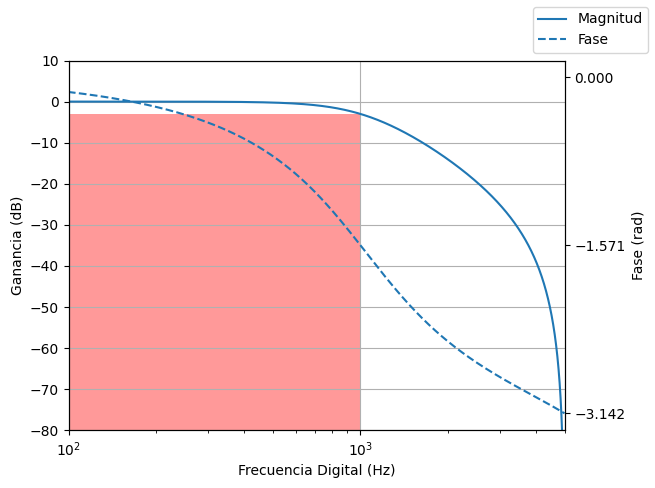

In [41]:

fs = 10e3

analog_b, analog_a = signal.butter(2, 2*np.pi*fc, analog=True, output='ba')

w_prewarp = 2*np.pi*fc

K_prewarp = w_prewarp/(np.tan(w_prewarp/(2*fs))) # Constante nueva de la transformada bilineal

 #bilinear() no admite elegir la constante directamente, internamente utiliza K=2*fs
digital_b, digital_a = signal.bilinear(analog_b, analog_a, fs=0.5*K_prewarp)

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W, 20*np.log10(np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')

print(f"Coeficientes numerador: {digital_b}")
print(f"Coeficientes denominador: {digital_a}")

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.set_xlim(1e2, fs/2)
ax1.set_ylim(-80, 10)
ax1.grid()
ax1.add_patch(patches.Rectangle((0, -3), fc, -1e9, linewidth=1, facecolor=(1,0,0,0.4)))

gain_at_fc = 20*np.log10(abs(digital_H[(np.abs(digital_W - fc)).argmin()]))

fig.legend()

print(f"Ganancia en frecuencia de corte: {gain_at_fc}")
print(f"Diferencia con -3.01dB: {gain_at_fc - gain_3db}")

plt.show()

Como lo indica la salida del codigo anterior, realizando el cambio de la constante de la transformada bilineal, lleva a que la ganancia en $f_c$ sea precisamente -3.01dB

# Ejercicio Guia #3

<p align="left">
  <img src="./res_1_a_1.png" width=500>
</p>

<p align="left">
  <img src="./res_1_a_2.png" width=500>
</p>

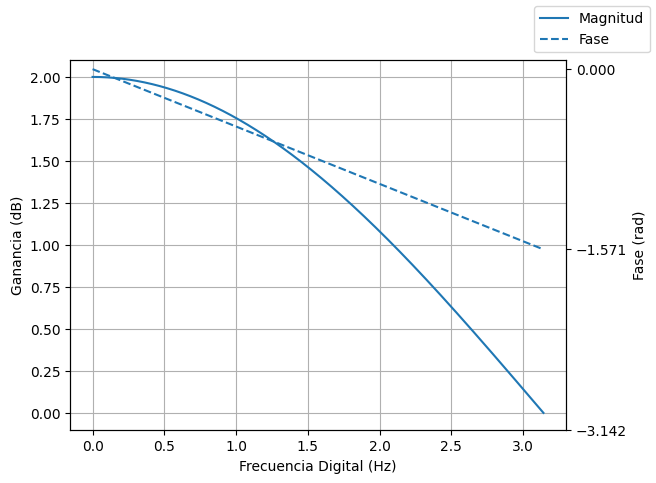

In [34]:

fs = 2*np.pi #Para que en los graficos de respuesta en frecuencia, Omega=pi corresponda a f=pi

digital_b, digital_a = [1,1], [1]

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W, (np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.grid()

fig.legend()

plt.show()

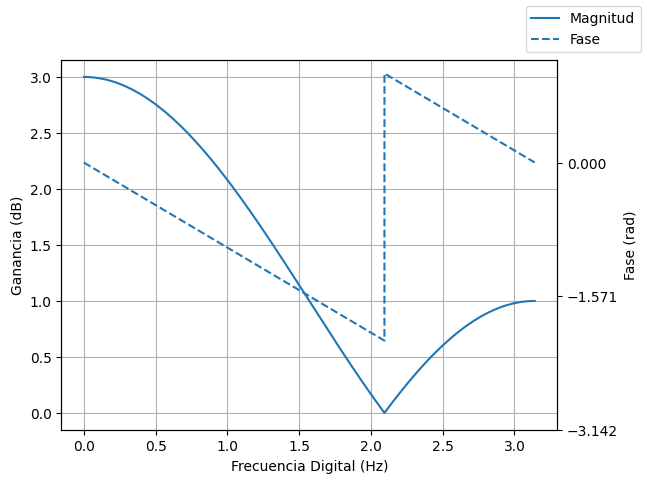

In [35]:

fs = 2*np.pi #Para que en los graficos de respuesta en frecuencia, Omega=pi corresponda a f=pi

digital_b, digital_a = [1,1, 1], [1]

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W, (np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.grid()

fig.legend()

plt.show()

<p align="left">
  <img src="./res_1_b_1.png" width=500>
</p>

<p align="left">
  <img src="./res_1_b_2.png" width=500>
</p>

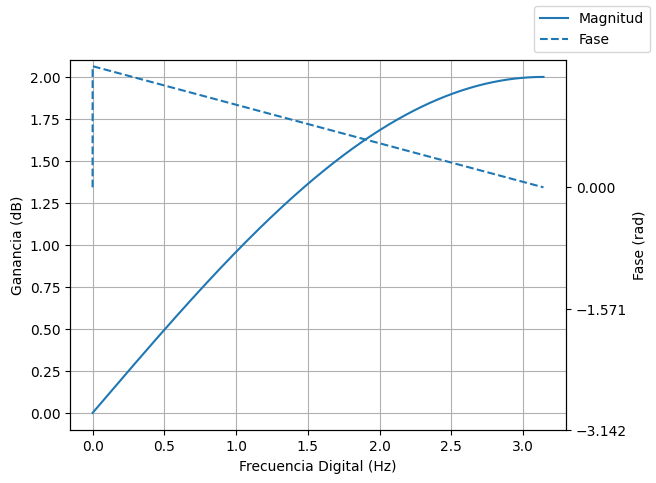

In [36]:

fs = 2*np.pi #Para que en los graficos de respuesta en frecuencia, Omega=pi corresponda a f=pi

digital_b, digital_a = [1,-1], [1]

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W, (np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.grid()

fig.legend()

plt.show()

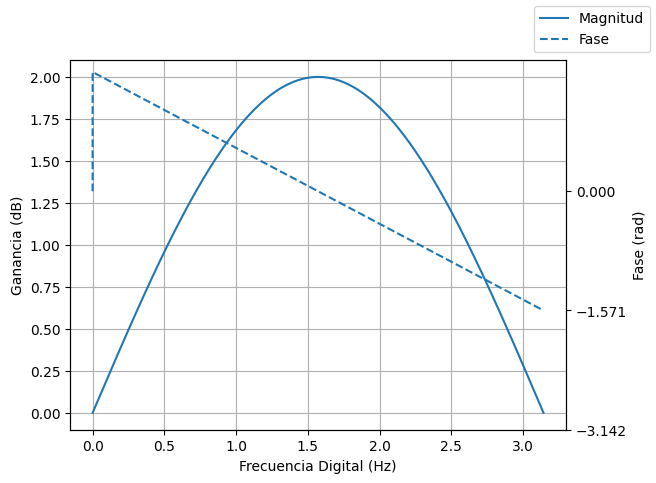

In [37]:

fs = 2*np.pi #Para que en los graficos de respuesta en frecuencia, Omega=pi corresponda a f=pi

digital_b, digital_a = [1,0,-1], [1]

digital_W, digital_H = signal.freqz(digital_b, digital_a, fs=fs, worN=10**4)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(digital_W, (np.abs(digital_H)), label='Magnitud')
ax2.plot(digital_W, np.angle(digital_H), linestyle='dashed', label='Fase')
ax1.set_xlabel('Frecuencia Digital (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax2.set_ylabel('Fase (rad)')
ax2.set_yticks([0, -np.pi/2, -np.pi])

ax1.grid()

fig.legend()

plt.show()

# Ejercicio Tarea 2

<p align="left">
  <img src="./res_2_a.png" width=600>
</p>

<p align="left">
  <img src="./res_2_b.png" width=600>
</p>